# Cell QC and Broad Cell Types

## Inputs

In [1]:
source('jupyterFunctions_broadCellType.R')
source('jupyterFunctions_perCellType.R')

In [2]:
CT <- 'broadCT'
CT_label <- 'Broad Cell Type'
data_prefix <- paste(sep='','../data/',CT,'/')
scATAC_meta <- readRDS(paste(sep='',data_prefix,'scATAC_meta.rds'))
multiome_meta <- readRDS(paste(sep='',data_prefix,'multiome_bothQC_meta.rds'))
scATAC_cellCount <- readRDS(paste(sep='',data_prefix,'scATAC_cellQC_cellCounts.rds'))
snATAC_cellCount <- readRDS(paste(sep='',data_prefix,'snATAC_cellQC_cellCounts.rds'))
snRNA_cellCount <- readRDS(paste(sep='',data_prefix,'snRNA_cellQC_cellCounts.rds'))
peakComparison_df <- readRDS(paste(sep='',data_prefix,'peakComparison_df.rds'))
chosenPeaks <- readRDS(paste(sep='',data_prefix,'broadCT_chosenPeaks.rds'))
scATAC_pxc_norm <- readRDS(paste(sep='',data_prefix,'scATAC_pxc_norm.rds'))
snATAC_pxc_norm <- readRDS(paste(sep='',data_prefix,'snATAC_pxc_norm.rds'))
snRNA_gxc_norm <- readRDS(paste(sep='',data_prefix,'snRNA_gxc_norm.rds'))
scATAC_pxCT_norm <- readRDS(paste(sep='',data_prefix,'scATAC_pxCT_norm.rds'))
snATAC_pxCT_norm <- readRDS(paste(sep='',data_prefix,'snATAC_pxCT_norm.rds'))
snRNA_gxCT_norm <- readRDS(paste(sep='',data_prefix,'snRNA_gxCT_norm.rds'))

In [3]:
broadCT_colors <- readRDS('../data/misc/broadCT_colors.rds')
broadCT_order <- c('Tcell','NK','Bplasma','myeloid','stromal','endothelial')

In [25]:
save_dir <- NA #'../output_v9/' #or NA if don't want to save
file_extension <- '.pdf'

## QC steps

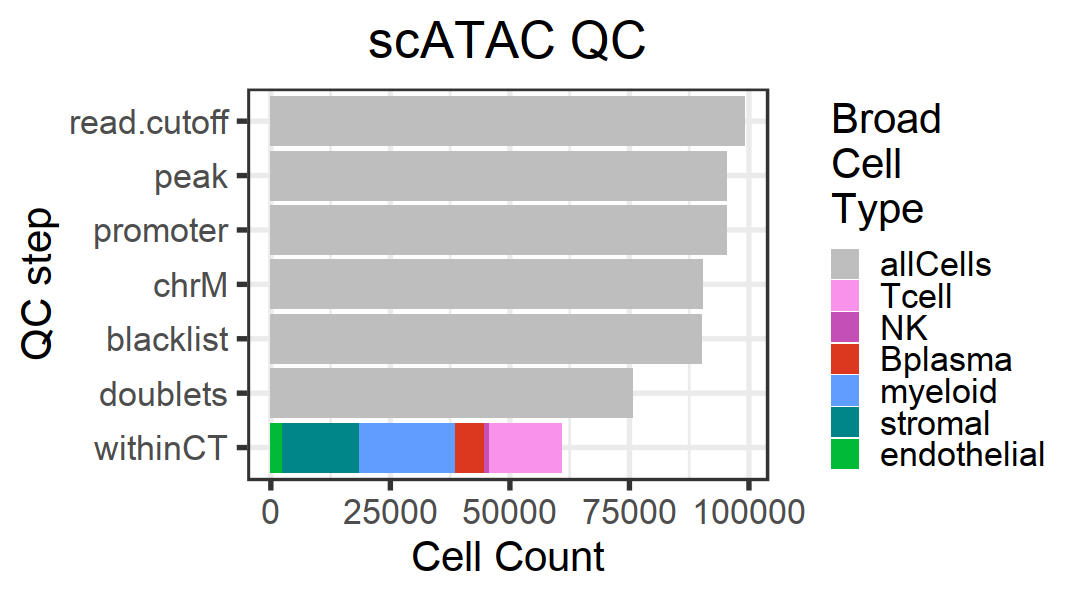

In [5]:
# Fig S2a

options(repr.plot.height=5,repr.plot.width=9)
g <- QC_steps_barplot(scATAC_cellCount,scATAC_meta[which(scATAC_meta$withinCT_passQC_flag==TRUE),],
                      'cellType',broadCT_colors,broadCT_order,tLab='scATAC QC')
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'scATAC_QCsteps',file_extension),
                            plot=g,units='in',height=5,width=9,dpi=600)

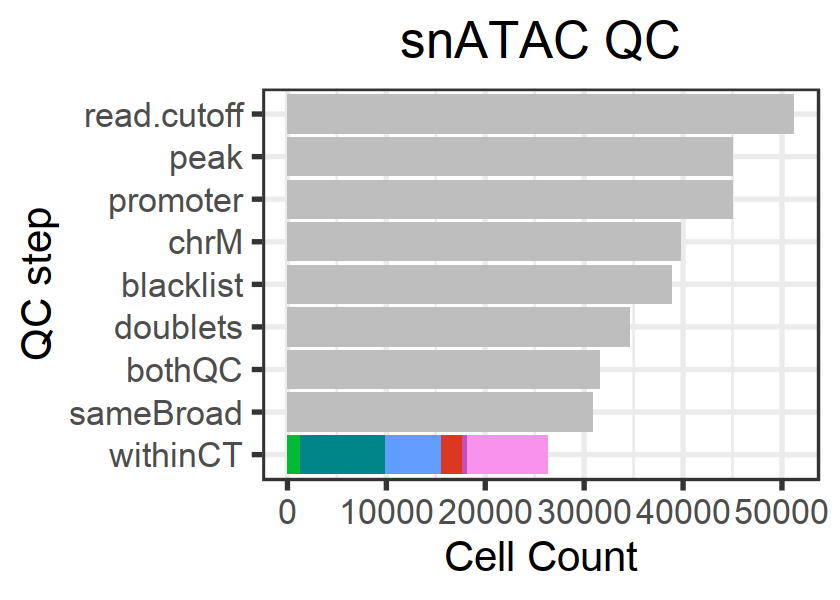

In [6]:
# Fig S2b

options(repr.plot.height=5,repr.plot.width=7)
g <- QC_steps_barplot(snATAC_cellCount,multiome_meta[which(multiome_meta$withinCT_passQC_flag==TRUE),],
                      'snATAC_cellType',broadCT_colors,broadCT_order,tLab='snATAC QC')
g <- g + theme(legend.position="none")
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snATAC_QCsteps',file_extension),
                            plot=g,units='in',height=5,width=7,dpi=600)

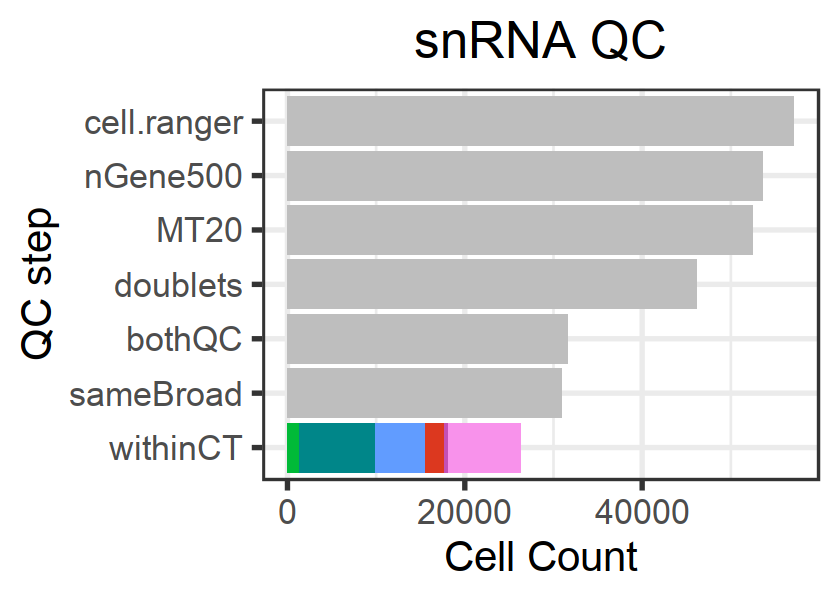

In [7]:
# Fig S2c

options(repr.plot.height=5,repr.plot.width=7)
g <- QC_steps_barplot(snRNA_cellCount,multiome_meta[which(multiome_meta$withinCT_passQC_flag==TRUE),],
                      'snRNA_cellType',broadCT_colors,broadCT_order,tLab='snRNA QC')
g <- g + theme(legend.position="none")
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snRNA_QCsteps',file_extension),
                            plot=g,units='in',height=5,width=7,dpi=600)

In [8]:
#Table S2

snATAC_meta <- multiome_meta[,c('sample','disease','site','batch',
                                grep('snATAC',colnames(multiome_meta),value=T),'withinCT_passQC_flag')]
colnames(snATAC_meta) <- sub('snATAC_','',colnames(snATAC_meta))
if(!identical(colnames(scATAC_meta),colnames(snATAC_meta))) stop('column naming issue')

scATAC_readCt_byCT <- readCount_byCT(scATAC_meta,'cellType')
scATAC_readCt_byCT$assay <- 'unimodal'

snATAC_readCt_byCT <- readCount_byCT(snATAC_meta,'cellType')
snATAC_readCt_byCT$assay <- 'multimodal'

ATAC_readCt_byCT <- rbind(scATAC_readCt_byCT,snATAC_readCt_byCT)
ATAC_readCt_byCT <- ATAC_readCt_byCT[,c(ncol(ATAC_readCt_byCT),1:(ncol(ATAC_readCt_byCT)-1))]
ATAC_readCt_byCT

if(!is.na(save_dir)) write.table(ATAC_readCt_byCT,
                                 file=paste(sep='',save_dir,CT,'_readCount_byAssayCT.txt'),
                                 quote=FALSE,sep='\t',row.names=FALSE)

assay,cellType,nReads_noDedup,nReads_dedup,nReads_peak,nReads_promoter,nReads_chrM,nReads_blacklist
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
unimodal,Bplasma,38620.09,24475.92,18740.85,8131.002,828.8588,1533.094
unimodal,endothelial,51627.79,31231.31,21039.90,8326.044,1480.6199,1775.103
unimodal,myeloid,38240.94,25243.15,19533.26,6927.385,344.7467,1079.018
unimodal,NK,41180.48,26041.60,21002.14,9194.442,576.0710,1249.373
unimodal,stromal,48411.56,30395.58,20298.52,6943.314,745.7880,1842.556
unimodal,Tcell,40579.75,25078.86,19955.23,8932.268,823.8534,1400.891
multimodal,Bplasma,124866.65,46437.40,36592.28,15938.759,1335.6198,5021.407
multimodal,endothelial,109230.56,45591.42,31673.28,12513.880,1464.9515,4085.149
multimodal,myeloid,139873.46,58182.37,44318.05,15460.952,1026.0425,4085.018


## Sample cell counts

In [9]:
OA_samples <- c('BRI-448', 'BRI-543', 'BRI-642', 'BRI-645', 'BRI-1281')
yLab_marker <- '>'

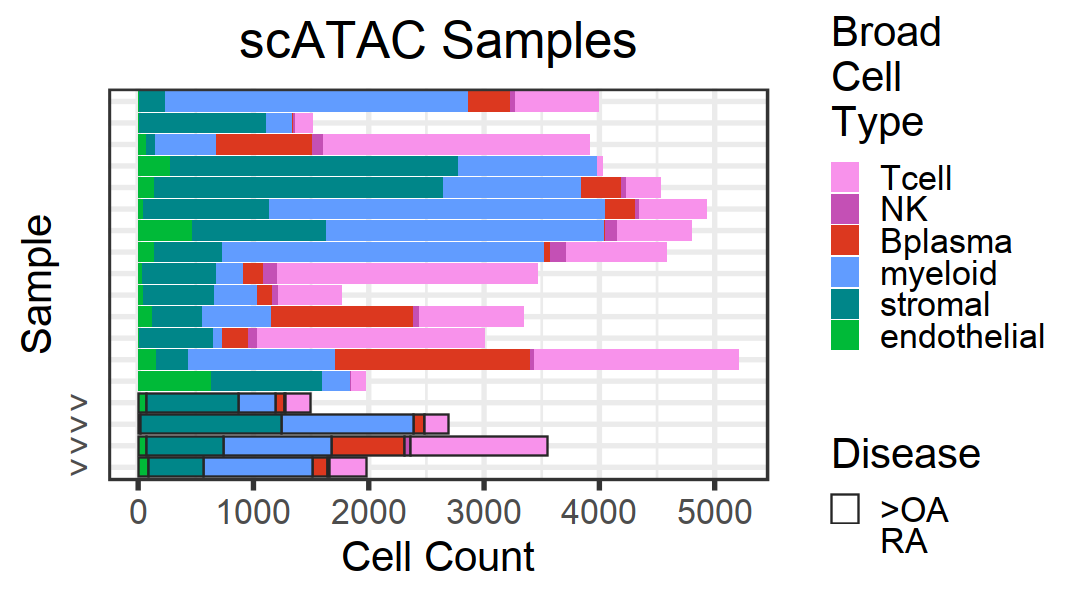

In [10]:
#Fig S2d

toPlot <- as.data.frame(table(scATAC_meta[which(scATAC_meta$withinCT_passQC_flag==TRUE),
                                          c('sample','cellType')]),stringsAsFactors=FALSE)
sample_order <- c(sort(unique(toPlot[which(!(toPlot$sample %in% OA_samples)),'sample'])),OA_samples[1:4])
toPlot$sample <- factor(toPlot$sample,levels=rev(sample_order))
toPlot$cellType <- factor(toPlot$cellType,levels=c(broadCT_order))

sample_yLab <- rep('',length(unique(toPlot$sample)))
names(sample_yLab) <- sample_order
sample_yLab[which(names(sample_yLab) %in% OA_samples)] <- yLab_marker

conv_df <- data.frame('sample'=sample_order,'disease'='RA',stringsAsFactors=FALSE)
conv_df[which(conv_df$sample %in% OA_samples),'disease'] <- 'OA'
toPlot$disease <- plyr::mapvalues(toPlot$sample,from=conv_df$sample,to=conv_df$disease)

options(repr.plot.height=5,repr.plot.width=9)
g <- ggplot(toPlot,aes_string(x='Freq',y='sample',fill='cellType',color='disease')) + 
        geom_bar(stat='identity',position='stack') +
        theme_bw(base_size=25) + 
        labs(x='Cell Count',y='Sample',fill='Broad\nCell\nType',title='scATAC Samples',color='Disease') + 
        theme(plot.title = element_text(hjust = 0.5)) + scale_fill_manual(values=broadCT_colors) + 
        theme(axis.ticks.y=element_blank()) + scale_y_discrete(labels=sample_yLab) + 
        scale_color_manual(values=c('grey15',NA),labels=c(paste(sep='',yLab_marker,'OA'),'RA')) +
        guides(color=guide_legend(override.aes=list(fill='white')))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'scATAC_sample_broadCT_cellCounts',file_extension),
                            plot=g,units='in',height=5,width=9,dpi=600)

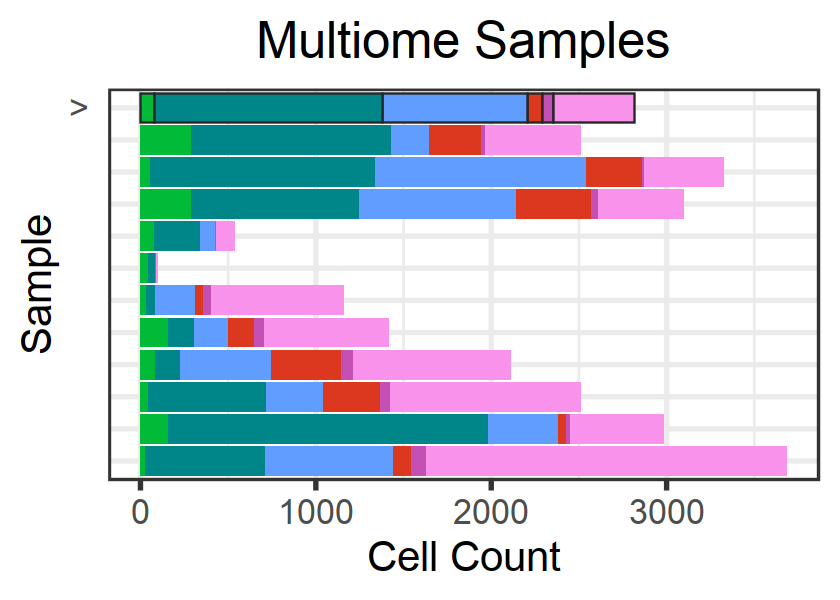

In [11]:
#Fig S2e

toPlot <- as.data.frame(table(multiome_meta[which(multiome_meta$withinCT_passQC_flag==TRUE),
                                            c('sample','snATAC_cellType')]),stringsAsFactors=FALSE)
sample_order <- sort(unique(toPlot$sample))
toPlot$sample <- factor(toPlot$sample,levels=rev(sample_order))
toPlot$snATAC_cellType <- factor(toPlot$snATAC_cellType,levels=c(broadCT_order))

sample_yLab <- rep('',length(unique(toPlot$sample)))
names(sample_yLab) <- sample_order
sample_yLab[which(names(sample_yLab) %in% OA_samples)] <- yLab_marker

conv_df <- data.frame('sample'=sample_order,'disease'='RA',stringsAsFactors=FALSE)
conv_df[which(conv_df$sample %in% OA_samples),'disease'] <- 'OA'
toPlot$disease <- plyr::mapvalues(toPlot$sample,from=conv_df$sample,to=conv_df$disease)

options(repr.plot.height=5,repr.plot.width=7)
g <- ggplot(toPlot,aes_string(x='Freq',y='sample',fill='snATAC_cellType',color='disease')) + 
        geom_bar(stat='identity',position='stack') +
        theme_bw(base_size=25) + labs(x='Cell Count',y='Sample',fill='Broad\nCell\nType',title='Multiome Samples') + 
        theme(plot.title = element_text(hjust = 0.5)) + scale_fill_manual(values=broadCT_colors) +
        theme(axis.ticks.y=element_blank()) + scale_y_discrete(labels=sample_yLab) + 
        scale_color_manual(values=c(NA,'grey15'),labels=c('RA',paste(sep='',yLab_marker,'OA'))) +
        theme(legend.position="none")
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'multiome_sample_broadCT_cellCounts',file_extension),
                            plot=g,units='in',height=5,width=7,dpi=600)

## Peak Overlaps

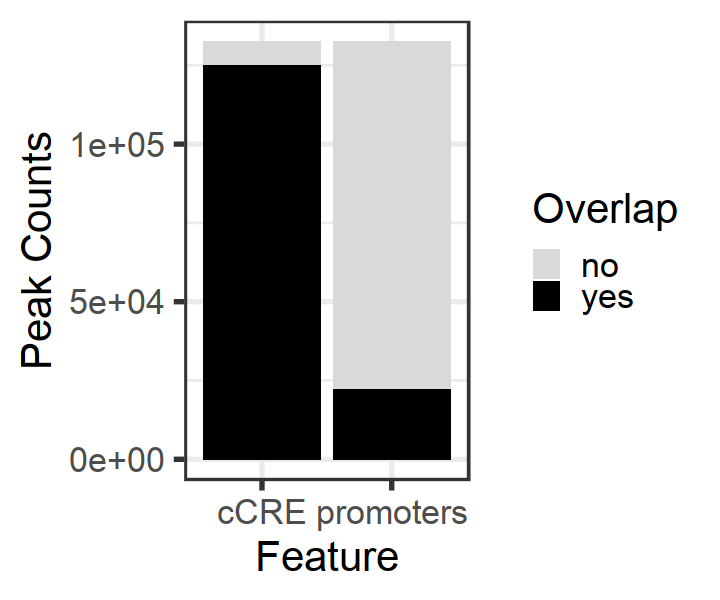

In [12]:
#Fig S2f

options(repr.plot.height=5,repr.plot.width=6)
g <- ggplot(peakComparison_df,aes_string(x='feature',y='peakCt',fill='overlap')) + 
        geom_bar(stat='identity',position='stack') +
        theme_bw(base_size=25) + labs(x='Feature',y='Peak Counts',fill='Overlap') +
        scale_fill_manual(values=c('grey85','black'))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'peakComparison',file_extension),
                            plot=g,units='in',height=5,width=6,dpi=600)

## Cell Type UMAPs

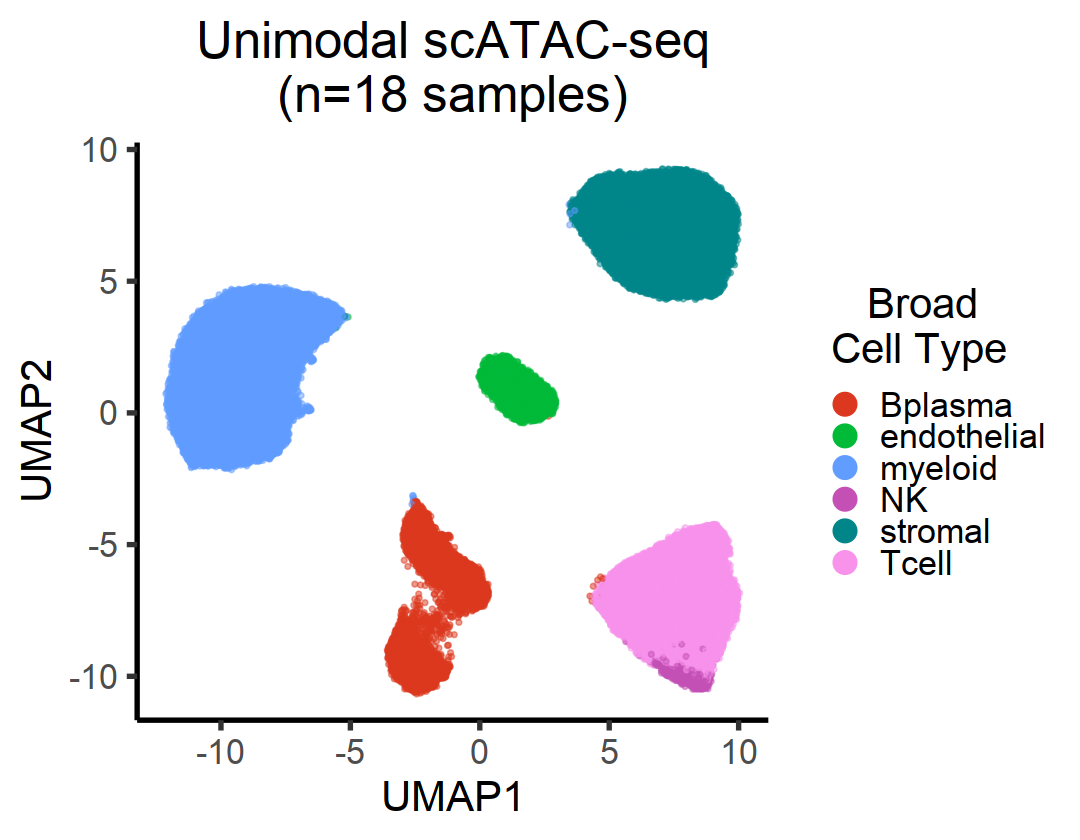

In [13]:
#Fig 1b left

options(repr.plot.height=7,repr.plot.width=9)
g <- ggplot(scATAC_meta,aes_string(x='UMAP1',y='UMAP2',color='cellType')) + geom_point(size=1,alpha=0.5) + 
        theme_classic(base_size=25) + scale_color_manual(values=broadCT_colors) + 
        labs(color='   Broad\nCell Type',title='Unimodal scATAC-seq\n(n=18 samples)') + 
        theme(plot.title = element_text(hjust = 0.5)) +
        guides(colour = guide_legend(override.aes = list(size=6,alpha=1)))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'scATAC_broadCT_UMAP',file_extension),
                            plot=g,units='in',height=7,width=9,dpi=600)

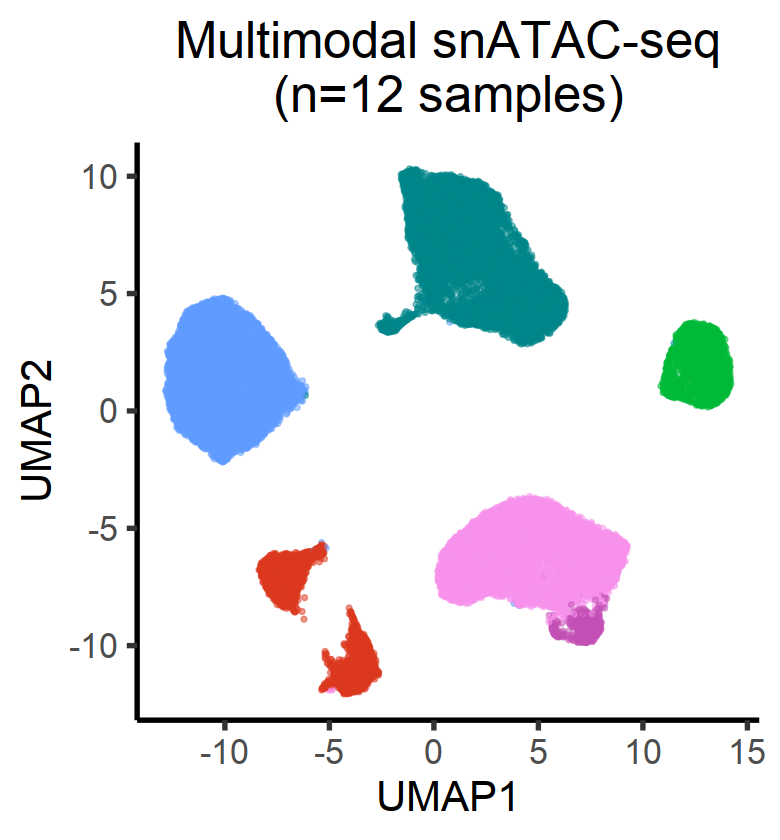

In [14]:
#Fig 1b right

options(repr.plot.height=7,repr.plot.width=6.5)
g <- ggplot(multiome_meta,aes_string(x='snATAC_UMAP1',y='snATAC_UMAP2',color='snATAC_cellType')) + 
        geom_point(size=1,alpha=0.5) + 
        theme_classic(base_size=25) + scale_color_manual(values=broadCT_colors) + 
        labs(color='   Broad\nCell Type',title='Multimodal snATAC-seq\n(n=12 samples)',x='UMAP1',y='UMAP2') + 
        theme(plot.title = element_text(hjust = 0.5)) +
        theme(legend.position="none")
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snATAC_broadCT_UMAP',file_extension),
                            plot=g,units='in',height=7,width=6.5,dpi=600)

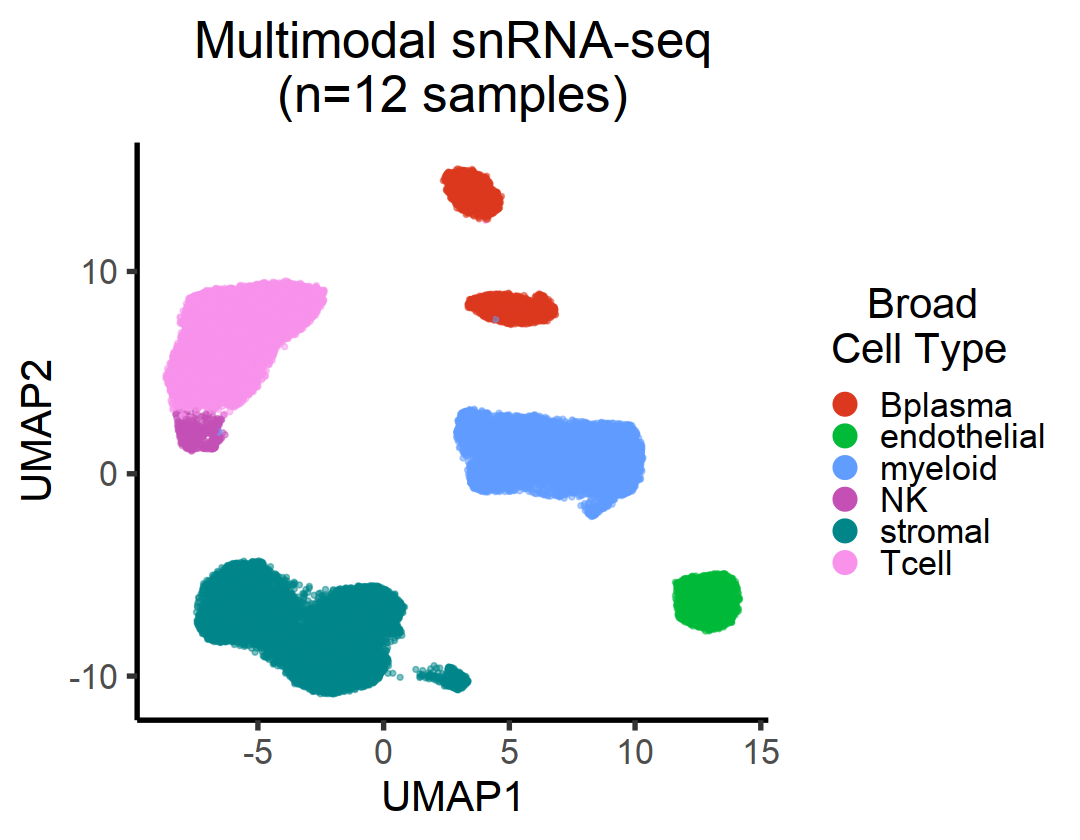

In [15]:
#Fig S2k

options(repr.plot.height=7,repr.plot.width=9)
g <- ggplot(multiome_meta,aes_string(x='snRNA_UMAP1',y='snRNA_UMAP2',color='snRNA_cellType')) + 
        geom_point(size=1,alpha=0.5) + 
        theme_classic(base_size=25) + scale_color_manual(values=broadCT_colors) + 
        labs(color='   Broad\nCell Type',title='Multimodal snRNA-seq\n(n=12 samples)',x='UMAP1',y='UMAP2') + 
        theme(plot.title = element_text(hjust = 0.5)) +
        guides(colour = guide_legend(override.aes = list(size=6,alpha=1)))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snRNA_broadCT_UMAP',file_extension),
                            plot=g,units='in',height=7,width=9,dpi=600)

## Marker UMAPs

In [16]:
genes_forUMAPs <- c('CD3D','NCAM1','MS4A1','TNFRSF17','CD163','PDPN','VWF')
if(!all(genes_forUMAPs %in% names(chosenPeaks))) stop('Genes for UMAP not in chosen genes')
peaks_forUMAPs <- chosenPeaks[genes_forUMAPs]

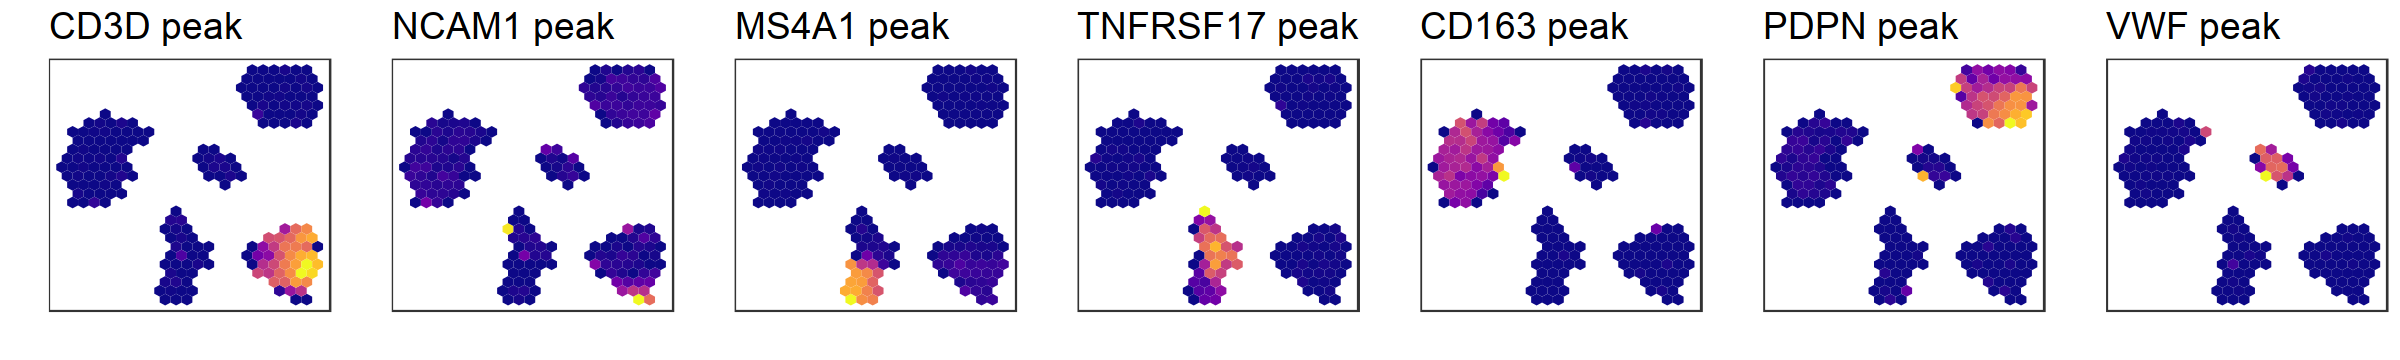

In [17]:
#Fig S2g

toPlot <- scATAC_pxc_norm[c(unname(peaks_forUMAPs)),] 
rownames(toPlot) <- paste(sep='',names(peaks_forUMAPs),' peak')

options(repr.plot.height=3,repr.plot.width=20)
g <- plot_markerPeaks_norm_hex_v2(scATAC_meta,toPlot,'UMAP1','UMAP2',
                                  plot_genes=rownames(toPlot),plotCol=nrow(toPlot),
                                  titleSize=22,hex_bins=23,cutCap=0,colorOpt='plasma',titleFace='plain')
grid.draw(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'scATAC_markerPeak_UMAP',file_extension),
                            plot=g,units='in',height=3,width=20,dpi=600)

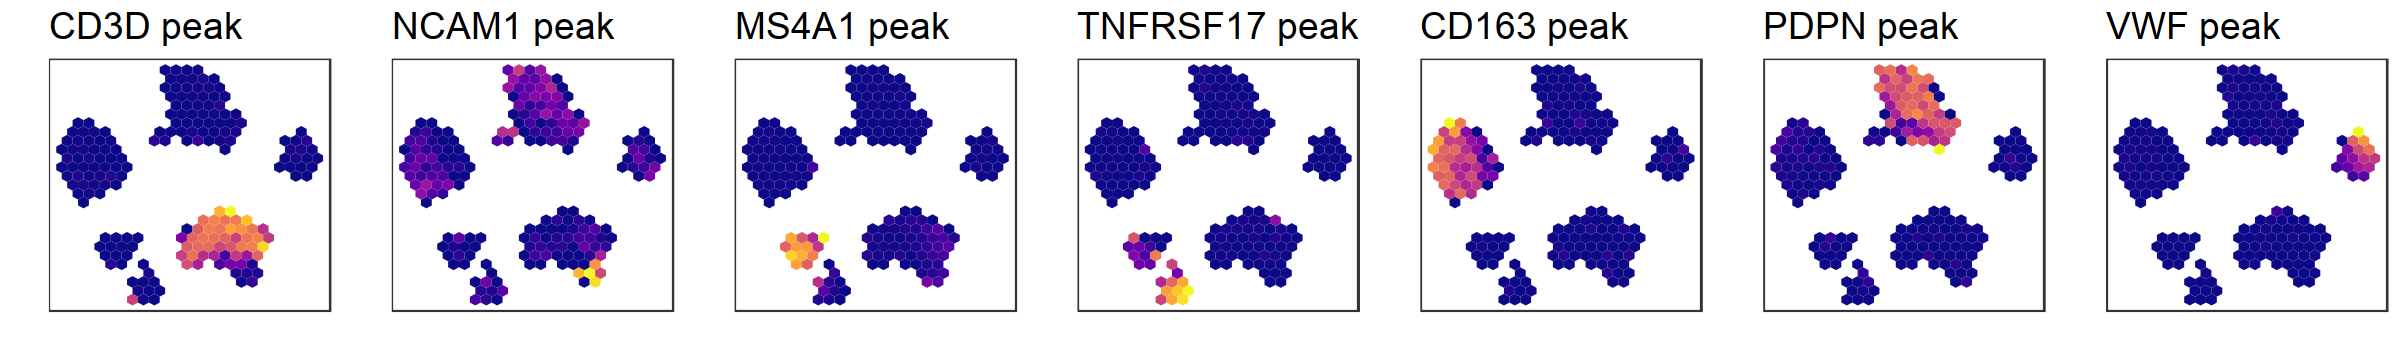

In [18]:
#Fig S2h

toPlot <- snATAC_pxc_norm[c(unname(peaks_forUMAPs)),] 
rownames(toPlot) <- paste(sep='',names(peaks_forUMAPs),' peak')

options(repr.plot.height=3,repr.plot.width=20)
g <- plot_markerPeaks_norm_hex_v2(multiome_meta,toPlot,'snATAC_UMAP1','snATAC_UMAP2',
                                  plot_genes=rownames(toPlot),plotCol=nrow(toPlot),
                                  titleSize=22,hex_bins=23,cutCap=0,colorOpt='plasma',titleFace='plain')
grid.draw(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snATAC_markerPeak_UMAP',file_extension),
                            plot=g,units='in',height=3,width=20,dpi=600)

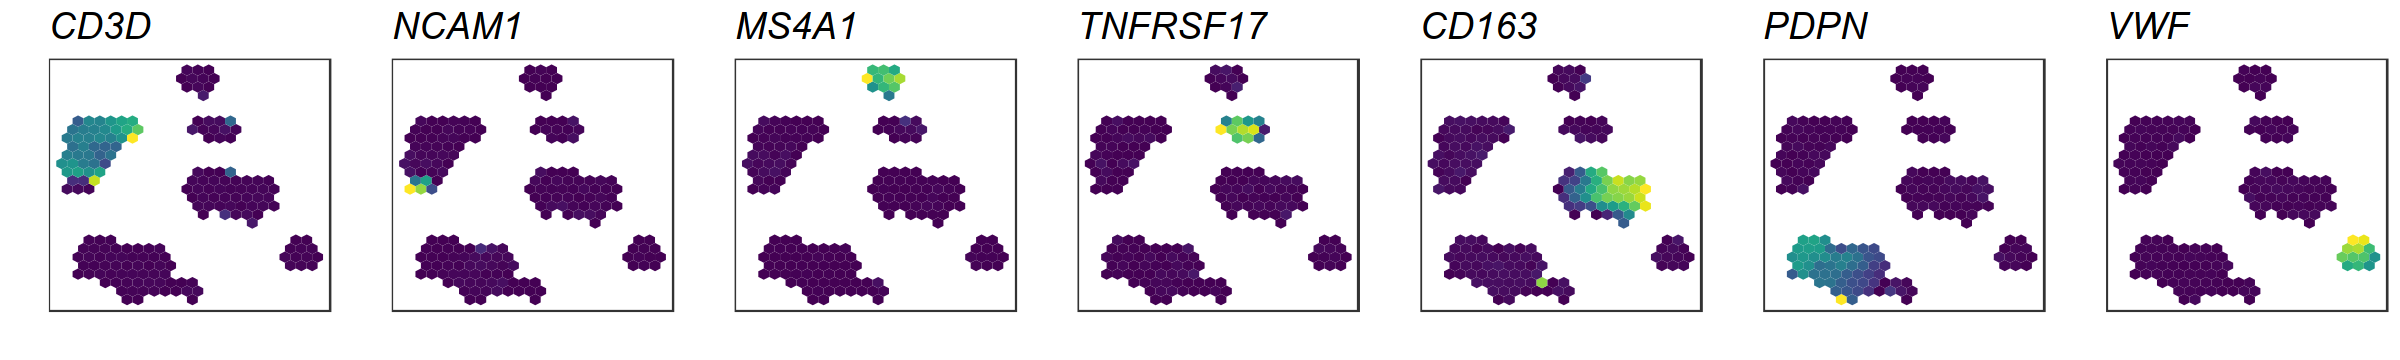

In [19]:
#Fig S2l

options(repr.plot.height=3,repr.plot.width=20)
g <- plot_markerPeaks_norm_hex_v2(multiome_meta,snRNA_gxc_norm,'snRNA_UMAP1','snRNA_UMAP2',
                                  plot_genes=genes_forUMAPs,plotCol=length(genes_forUMAPs),
                                  titleSize=22,hex_bins=23,cutCap=0)
grid.draw(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snRNA_markerGene_UMAP',file_extension),
                            plot=g,units='in',height=3,width=20,dpi=600)

## Marker Heatmaps

In [20]:
scale_lim <- 2.05

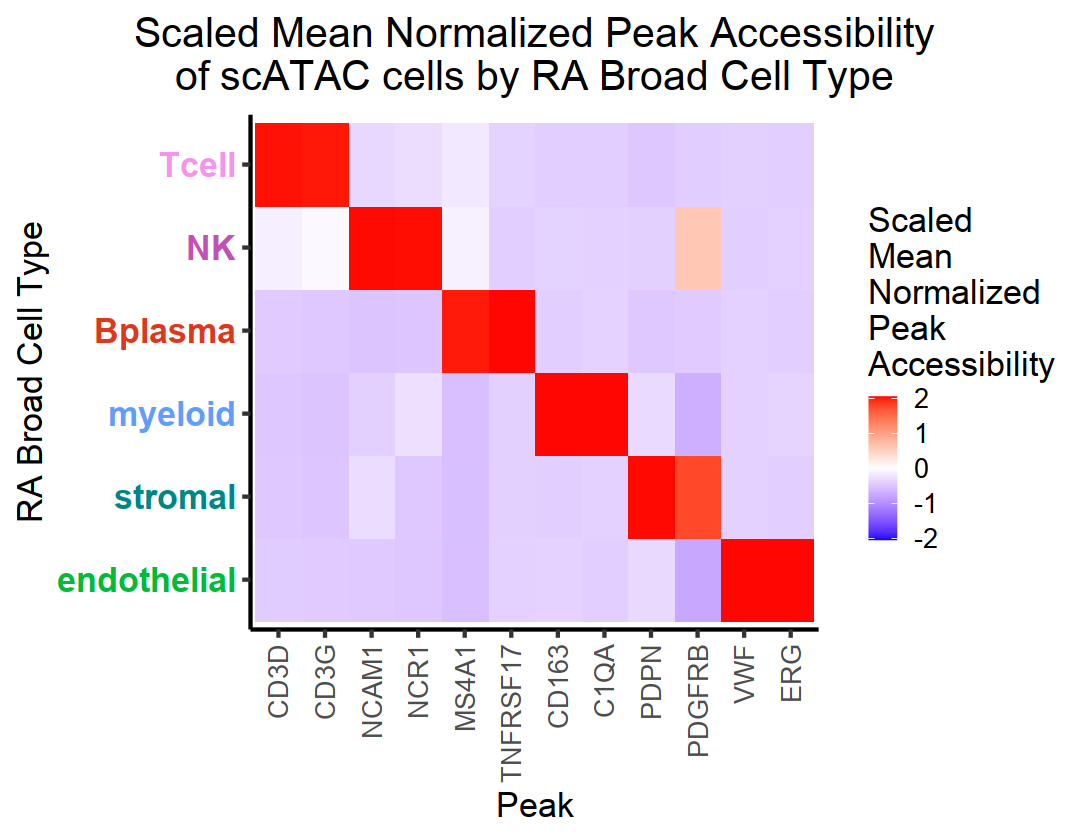

In [21]:
#Fig S2i

scATAC_pxCT_norm_subset_scaled <- scalePeak_forHeatmap(names(chosenPeaks),broadCT_order,chosenPeaks,scATAC_pxCT_norm)

if(max(abs(scATAC_pxCT_norm_subset_scaled))>=scale_lim) stop('scale limit too low')

options(repr.plot.height=7,repr.plot.width=9)
g <- pseudobulk_scaled_heatmap(scATAC_pxCT_norm_subset_scaled,'Peak',paste('RA',CT_label),
                               'Scaled\nMean\nNormalized\nPeak\nAccessibility',
                               plotTit=paste('Scaled Mean Normalized Peak Accessibility\nof scATAC cells by RA',CT_label),
                               scale_lim=scale_lim,clustColors=broadCT_colors)
print(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'scATAC_markerPeak_heatmap',file_extension),
                            plot=g,units='in',height=7,width=9,dpi=600)

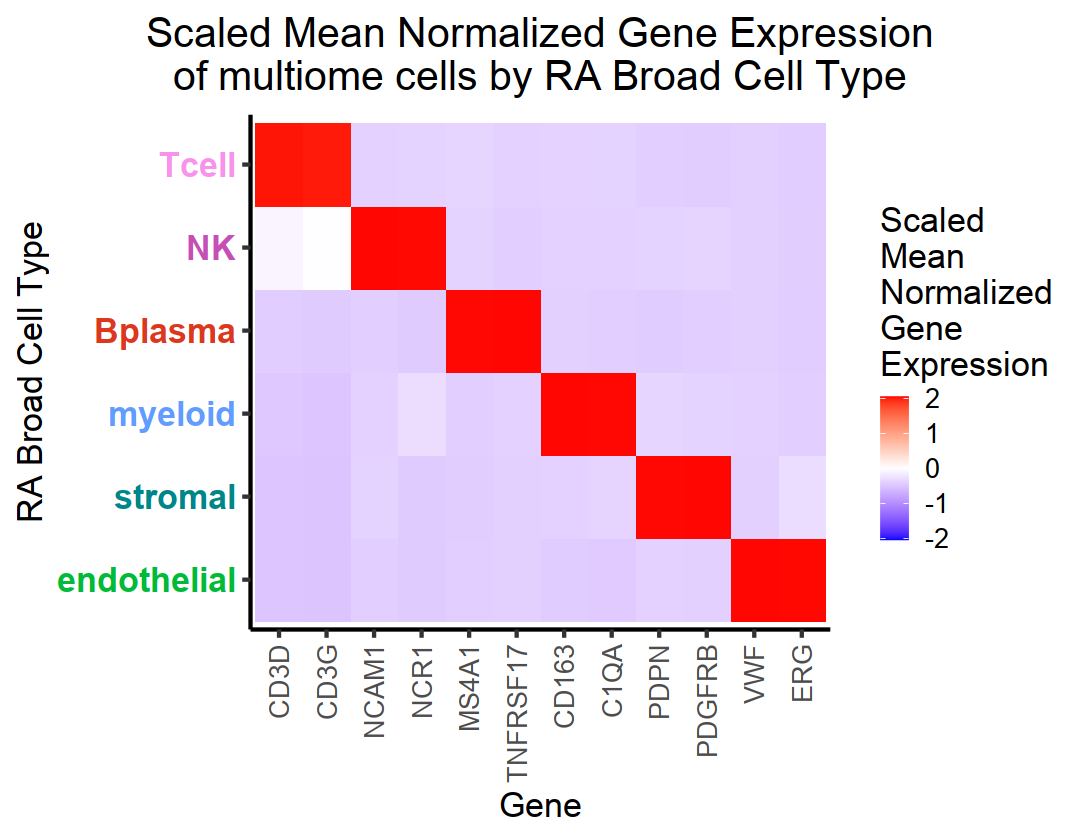

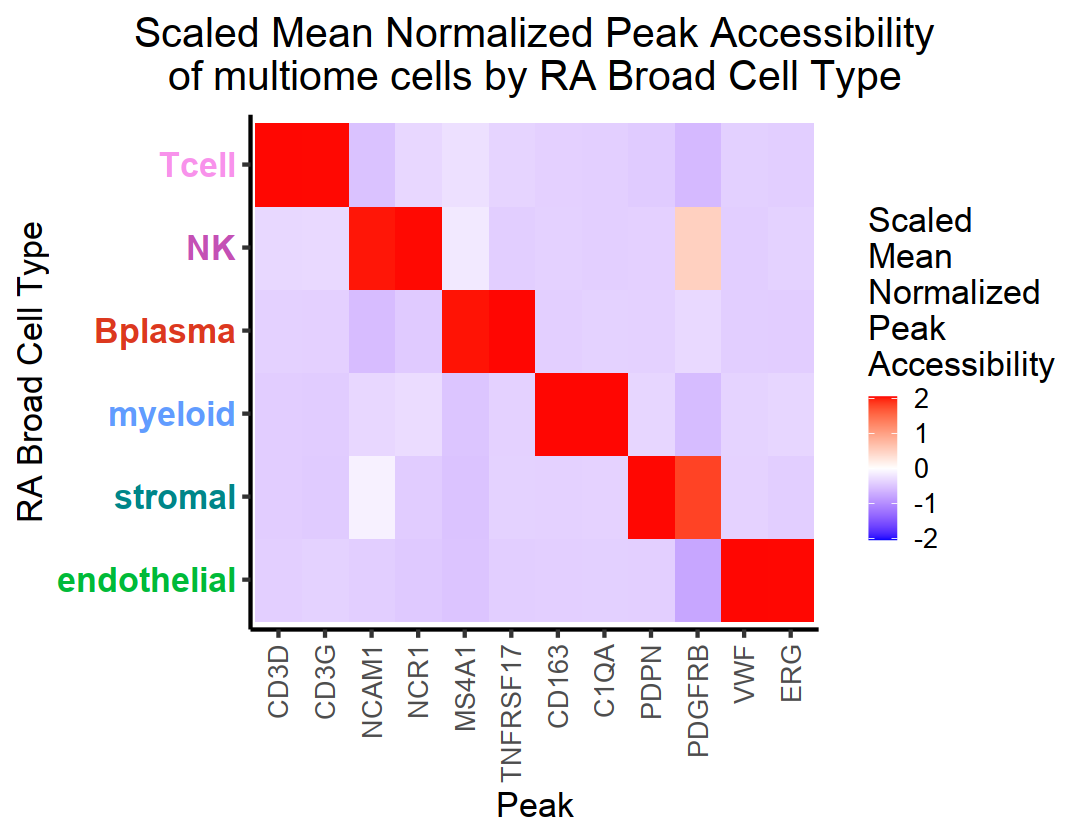

In [22]:
#Fig S2j,m

res <- scaleFeat_forHeatmap(names(chosenPeaks),broadCT_order,chosenPeaks,snRNA_gxCT_norm,snATAC_pxCT_norm)
snRNA_gxCT_norm_subset_scaled <- res$gxCT_norm_subset_scaled
snATAC_pxCT_norm_subset_scaled <- res$pxCT_norm_subset_scaled

if(max(abs(snRNA_gxCT_norm_subset_scaled),abs(snATAC_pxCT_norm_subset_scaled),
       na.rm=TRUE)>=scale_lim) stop('scale limit too low')


options(repr.plot.height=7,repr.plot.width=9)
g <- pseudobulk_scaled_heatmap(snRNA_gxCT_norm_subset_scaled,'Gene',paste('RA',CT_label),
                               'Scaled\nMean\nNormalized\nGene\nExpression',
                               plotTit=paste('Scaled Mean Normalized Gene Expression\nof multiome cells by RA',CT_label),
                               scale_lim=scale_lim,clustColors=broadCT_colors)
print(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snRNA_markerGene_heatmap',file_extension),
                            plot=g,units='in',height=7,width=9,dpi=600)

g <- pseudobulk_scaled_heatmap(snATAC_pxCT_norm_subset_scaled,'Peak',paste('RA',CT_label),
                               'Scaled\nMean\nNormalized\nPeak\nAccessibility',
                               plotTit=paste('Scaled Mean Normalized Peak Accessibility\nof multiome cells by RA',CT_label),
                               scale_lim=scale_lim,clustColors=broadCT_colors)
print(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'snATAC_markerPeak_heatmap',file_extension),
                            plot=g,units='in',height=7,width=9,dpi=600)

## Symphony mapping scores by broad cell type

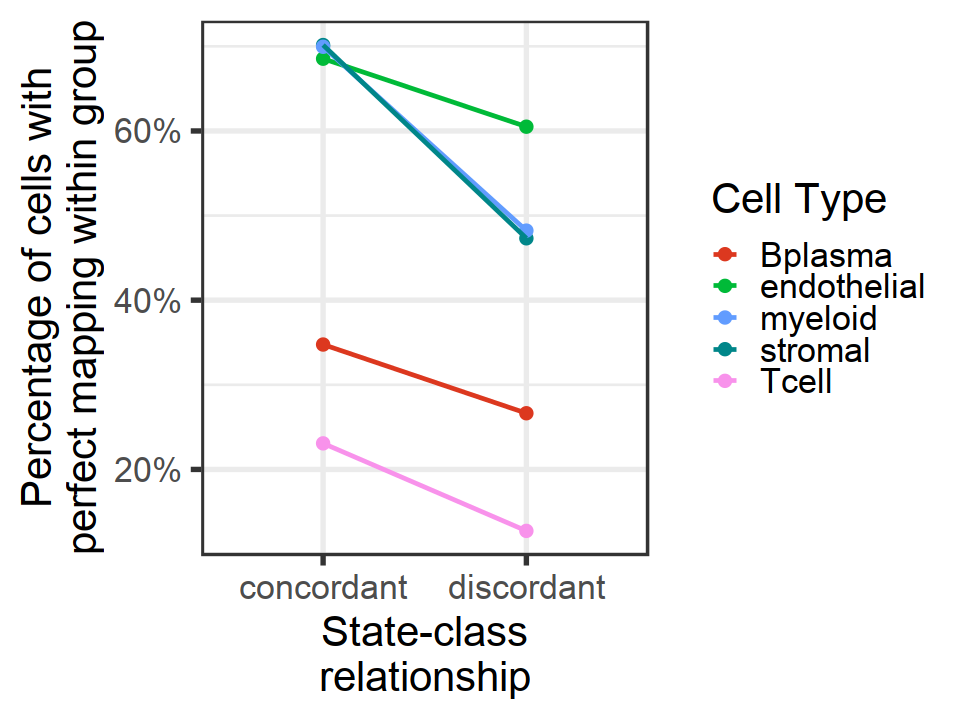

In [23]:
#Fig S10i

symphony_mapScore_byCT_df <- symphony_mapScore_byCT('../data/',outVal='discordant',inVal='concordant')

options(repr.plot.height=6,repr.plot.width=8)
g <- ggplot(symphony_mapScore_byCT_df,aes_string(x='group',y='perc',color='cellType',group='cellType')) + 
        geom_point(size=3) + geom_line(size=1) + theme_bw(base_size=25) + scale_color_manual(values=broadCT_colors) +
        labs(x='State-class\nrelationship',y='Percentage of cells with\nperfect mapping within group',color='Cell Type') +
        scale_y_continuous(labels = percent_format(scale = 100))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'symphony_mapScore_byCT',file_extension),
                            plot=g,units='in',height=6,width=8,dpi=600)

## Session Info

In [24]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/kew47/miniconda3/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] repr_1.0.1         gridExtra_2.3      RColorBrewer_1.1-2 scales_1.1.1      
 [5] viridis_0.5.1      viridisLite_0.3.0  ggrepel_0.8.2      ggrastr_0.2.3     
 [9] stringr_1.4.0      ggpubr_0.4.0       presto_1.0.0       Rcpp_1.0.4.6      
[13] ROCR_1.0-7         gplots_3.0.1.1     Rmisc_1.5.1        plyr_1.8.6        
[17] lattice_0.20-41    gtools_3.8.2       tidyr_1.0.3        Matrix_1.2-18     
[21] ggplot2_3.3.0     

loaded via a namespace (and not attached):
 [1] jsonlite_1.7.1      carData_3.0-4       vipor_0.4.5        
 [4] cellranger_1.1.0    pillar_1.4.4        backports_1.1.6    
